In [1]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)

folder_path = "data/atleten_data"
df = pd.DataFrame()


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_temp = pd.read_csv(file_path)
        df = pd.concat([df, df_temp])

df.rename(columns={"Ervaring": "Exp", "Kracht": "Kra", "Snelheid": "Sne", "Uithouding": "Uit", "Lenigheid": "Len", "Springen": "Spr", "Werpen": "Wrp"}, inplace=True)
df.drop(columns=["Humeur","Resultaten test", "Favoriete onderdeel", "Naam", "Leeftijd", "Land", "Geslacht", "Specialiteit", "Lengte", "Gewicht"], inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.to_csv("maxid.csv", index=False)

df["skills"] = df.apply(lambda row: sorted([row["Kra"], row["Sne"], row["Uit"], row["Len"], row["Spr"], row["Wrp"]], reverse=True), axis=1)
df["SPS"] = df.apply(lambda row: sorted([row["SP1"], row["SP2"]], reverse=True), axis=1)
df["skill1"] = df.apply(lambda row: row["skills"][0], axis=1)
df["skill2"] = df.apply(lambda row: row["skills"][1], axis=1)
df["skill3"] = df.apply(lambda row: row["skills"][2], axis=1)
df["SPS1"] = df.apply(lambda row: row["SPS"][0], axis=1)
df["SPS2"] = df.apply(lambda row: row["SPS"][1], axis=1)
df["skillstr"] = df["skills"].apply(lambda x: "-".join([str(i) for i in x]))
df.drop(columns=["Kra", "Sne", "Uit", "Len", "Spr", "Wrp", "SP1", "SP2"], inplace=True)


df.sort_values(by=["MaxID"], inplace=True)

df.head()

,AtleetID,MaxID,Exp,Vorm,Zorg,skills,SPS,skill1,skill2,skill3,SPS1,SPS2,skillstr
402,5627896,20,1,11,7,"[3, 3, 3, 3, 2, 2]","[0, 0]",3,3,3,0,0,3-3-3-3-2-2
1241,5661232,40,1,14,6,"[3, 3, 3, 2, 1, 1]","[0, 0]",3,3,3,0,0,3-3-3-2-1-1
1740,5663190,40,1,14,7,"[3, 2, 2, 2, 1, 1]","[0, 0]",3,2,2,0,0,3-2-2-2-1-1
1116,5662212,40,1,14,6,"[3, 3, 2, 1, 0, 0]","[0, 0]",3,3,2,0,0,3-3-2-1-0-0
1937,5661204,40,1,14,6,"[3, 3, 2, 2, 1, 1]","[0, 0]",3,3,2,0,0,3-3-2-2-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,5102993,61620,15,19,19,"[20, 20, 1, 0, 0, 0]","[15, 12]",20,20,1,15,12,20-20-1-0-0-0
2762,4709521,63210,20,15,20,"[19, 0, 0, 0, 0, 0]","[18, 15]",19,0,0,18,15,19-0-0-0-0-0
2652,4709521,64020,20,15,20,"[19, 0, 0, 0, 0, 0]","[18, 15]",19,0,0,18,15,19-0-0-0-0-0
2174,5087965,69740,13,14,20,"[20, 3, 2, 1, 0, 0]","[20, 15]",20,3,2,20,15,20-3-2-1-0-0


In [3]:
df_temp = df.copy()

df_temp[df_temp["MaxID"] < 50]



,AtleetID,MaxID,Exp,Vorm,Zorg,skills,SPS,skill1,skill2,skill3,SPS1,SPS2,skillstr
402,5627896,20,1,11,7,"[3, 3, 3, 3, 2, 2]","[0, 0]",3,3,3,0,0,3-3-3-3-2-2
1241,5661232,40,1,14,6,"[3, 3, 3, 2, 1, 1]","[0, 0]",3,3,3,0,0,3-3-3-2-1-1
1740,5663190,40,1,14,7,"[3, 2, 2, 2, 1, 1]","[0, 0]",3,2,2,0,0,3-2-2-2-1-1
1116,5662212,40,1,14,6,"[3, 3, 2, 1, 0, 0]","[0, 0]",3,3,2,0,0,3-3-2-1-0-0
1937,5661204,40,1,14,6,"[3, 3, 2, 2, 1, 1]","[0, 0]",3,3,2,0,0,3-3-2-2-1-1


In [40]:
map_zorg =  {1:  (0, 0), 2 : (0, 0), 3 : (0, 0), 4 : (-0, 0), 5 : (0, 0),  6:  (0, 0), 7:  (0, 0), 8:  (10, 10),  9:  (10, 0),  10: (0, 0), 
             11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0),  15: (-0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0),    19: (0, 0),   20: (0, 0)}

map_exp =   {1:  (0, 0), 2 : (0, 0), 3 : (0, 0), 4 : (0, 0), 5 : (0, 0), 6:  (0, 0), 7:  (0, 0), 8:  (0, 0), 9:  (0, 0), 10: (0, 0), 
             11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0), 15: (0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0), 19: (0, 0), 20: (0, 0)}

map_sp =    {1:  (0, 0), 2 : (0, 0), 3 : (0, 0), 4 : (0, 0), 5 : (0, 0), 6:  (0, 0), 7:  (0, 0), 8:  (0, 0), 9:  (0, 0), 10: (0, 0), 
             11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0), 15: (0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0), 19: (0, 0), 20: (0, 0)}

map_skill = {1:  (0, 0), 2 : (0, 0), 3 : (0, 0), 4 : (0, 0), 5 : (0, 0), 6:  (0, 0), 7:  (0, 0), 8:  (0, 0), 9:  (0, 0), 10: (0, 0), 
             11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0), 15: (0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0), 19: (0, 0), 20: (0, 0)}

map_vorm =  {1:  (0, 0), 2 : (0, 0), 3 : (0, 0), 4 : (0, 0), 5 : (0, 0), 6:  (0, 0), 7:  (0, 0), 8:  (0, 0), 9:  (0, 0), 10: (0, 0), 
             11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0), 15: (0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0), 19: (0, 0), 20: (0, 0)}

In [41]:
map_skills = [0, 0, 0, 0, 0, 0, 50, 100, 200, 400, 700, 1100, 1800, 2800, 4000, 6000, 8000, 11000, 15000, 20000, 25000, 30000]

def maxid_min_max(row):

    map_skills = [0, 0, 0, 0, 0, 0, 50, 100, 200, 300, 600, 1100, 1800, 2800, 4000, 6000, 8000, 11000, 15000, 20000, 25000, 30000]
    map_sp =     [0, 0, 0, 0, 0, 0, 50, 150, 300, 600, 1000, 1500, 2400, 3700, 5400, 7500, 10000, 12500]
    map_zorg =   [0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 100, 150, 200, 300, 450, 600, 800, 1000]
    map_form =   [0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 50, 50, 100, 150, 150, 200]

    try:
        skill_min = sum(map_skills[int(x)] for x in row[["Kra", "Uit", "Sne", "Len", "Spr", "Wrp"]])
        skill_max = sum(map_skills[int(x+1)] for x in row[["Kra", "Uit", "Sne", "Len", "Spr", "Wrp"]])
        sp_min = sum(map_sp[int(x)] for x in row[["SP1", "SP2"]])
        sp_max = sum(map_sp[int(x+1)] for x in row[["SP1", "SP2"]])
        zorg_min = map_zorg[int(row["Zorg"])]
        zorg_max = map_zorg[int(row["Zorg"]+1)]
        form_min = map_form[int(row["Vorm"])]
        form_max = map_form[int(row["Vorm"]+1)]
    except IndexError:
        print(row)


    return {"skill_min": skill_min, "skill_max": skill_max, "sp_min": sp_min, "sp_max": sp_max, 
            "zorg_min": zorg_min, "zorg_max": zorg_max, "form_min": form_min, "form_max": form_max}

In [42]:
map_skills = [0, 0, 0, 0, 0, 0, 50, 100, 200, 400, 600, 1000, 1800, 2800, 4000, 6000, 8000, 11000, 15000, 20000, 25000, 30000]
map_zorg =   [0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 100, 150, 200, 300, 450, 600, 800, 1000]

map_skills_try = [(round(x**4 * 0.004), map_zorg[x]) for x in range(0, 22)]

map_skills_try

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (2, 0),
 (5, 0),
 (10, 0),
 (16, 0),
 (26, 0),
 (40, 0),
 (59, 0),
 (83, 0),
 (114, 50),
 (154, 100),
 (202, 150),
 (262, 200),
 (334, 300),
 (420, 450),
 (521, 600),
 (640, 800),
 (778, 1000)]

In [43]:
df

,AtleetID,MaxID,Exp,Vorm,Zorg,skills,SPS,skill1,skill2,skill3,SPS1,SPS2,skillstr
407,5627896,20,1,11,7,"[3, 3, 3, 3, 2, 2]","[0, 0]",3,3,3,0,0,3-3-3-3-2-2
1100,5660501,50,1,14,7,"[4, 2, 2, 1, 1, 1]","[0, 0]",4,2,2,0,0,4-2-2-1-1-1
1625,5660472,50,1,15,7,"[2, 2, 1, 1, 1, 1]","[0, 0]",2,2,1,0,0,2-2-1-1-1-1
2049,5662139,50,1,15,7,"[3, 2, 2, 2, 1, 1]","[0, 0]",3,2,2,0,0,3-2-2-2-1-1
1397,5659056,50,1,15,6,"[3, 3, 3, 2, 1, 0]","[0, 0]",3,3,3,0,0,3-3-3-2-1-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,5019312,54020,12,16,19,"[20, 20, 2, 1, 0, 0]","[11, 10]",20,20,2,11,10,20-20-2-1-0-0
3121,4971455,55570,16,17,19,"[20, 20, 1, 0, 0, 0]","[12, 10]",20,20,1,12,10,20-20-1-0-0-0
3189,4971455,55890,16,15,19,"[20, 20, 1, 0, 0, 0]","[12, 10]",20,20,1,12,10,20-20-1-0-0-0
2762,4709521,63210,20,15,20,"[19, 0, 0, 0, 0, 0]","[18, 15]",19,0,0,18,15,19-0-0-0-0-0


In [4]:
df_temp = df.copy()[["MaxID", "Exp", "Zorg", "skill1", "skill2", "skill3", "SPS1", "SPS2"]]
dup_df = df_temp.groupby(["Exp", "skill1", "skill2", "skill3", "SPS1", "SPS2", "Zorg"]).size().reset_index(name='Aantal')

In [5]:
dup_df.sort_values(by=["Aantal"], ascending=False, inplace=True)
dup_df

,Exp,skill1,skill2,skill3,SPS1,SPS2,Zorg,Aantal
2313,1,10,3,3,0,0,11,31
2318,1,10,3,3,0,0,16,25
1090,1,8,3,3,0,0,14,25
2321,1,10,3,3,0,0,19,24
1083,1,8,3,3,0,0,7,23
...,...,...,...,...,...,...,...,...
5080,19,13,8,0,13,10,20,1
5081,19,13,11,0,10,9,19,1
5083,19,17,7,0,13,13,19,1
5085,19,18,10,0,10,10,17,1


In [11]:
df1 = df.copy()
df1 = df1[(df1["Exp"] == 1) & (df1["SPS1"] == 0) & (df1["SPS2"] == 0) & (df1["Zorg"] == 14) &
                  (df1["skill1"] == 8) & (df1["skill2"] == 3) & (df1["skill3"] == 3)]

<Axes: xlabel='Vorm', ylabel='MaxID'>

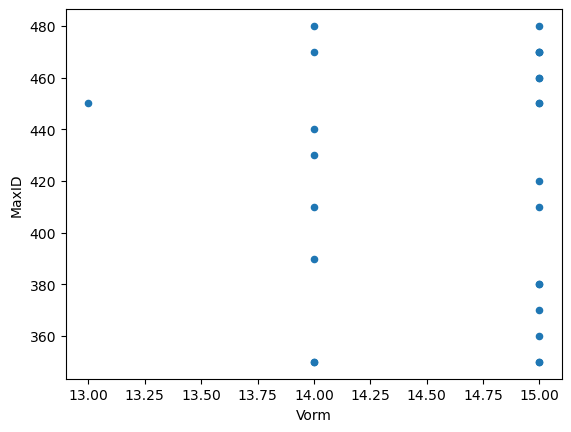

: 

In [ ]:
df1.plot.scatter(x="Vorm", y="MaxID")